In [12]:
import pandas as pd

df = pd.read_csv(r'/home/jonathan/Documents/IDATT2502/A5/agaricus-lepiota.data')

df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Task 4: The edibility is defined with a boolean value, either it is edible, or it is not. Habitat could affect edibility, as the shrooms take in surrounding poisons and what-not. Spore-print-color would also be an indicator to how edible a shroom is.

In [14]:
df[['habitat', 'edibility', 'spore-print-color' ]].groupby('habitat').describe()

edibility                  spore-print-color                 
            count unique top  freq             count unique top  freq
habitat                                                              
d            3148      2   e  1880              3148      5   n  1008
g            2148      2   e  1408              2148      5   n   624
l             832      2   p   592               832      5   w   640
m             292      2   e   256               292      3   n   128
p            1144      2   p  1008              1144      4   w   616
u             368      2   p   272               368      3   h   144
w             192      1   e   192               192      1   w   192

In [18]:
df[['habitat', 'edibility', 'spore-print-color' ]].groupby('spore-print-color').describe().transpose

<bound method DataFrame.transpose of                   habitat                  edibility                 
                    count unique top  freq     count unique top  freq
spore-print-color                                                    
b                      48      1   l    48        48      1   e    48
h                    1632      4   g   576      1632      2   p  1584
k                    1872      5   d   960      1872      2   e  1648
n                    1968      6   d  1008      1968      2   e  1744
o                      48      1   l    48        48      1   e    48
r                      72      2   m    36        72      1   p    72
u                      48      1   d    48        48      1   e    48
w                    2388      5   d   652      2388      2   p  1812
y                      48      1   l    48        48      1   e    48>

Task 4: You can see from the distributions that habitat has an effect on edibility, as well as the spore-print-color.

In [16]:
shrooms = pd.get_dummies(df)
shrooms.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


array([[<AxesSubplot:title={'center':'edibility_e'}>,
        <AxesSubplot:title={'center':'edibility_p'}>],
       [<AxesSubplot:title={'center':'population_s'}>,
        <AxesSubplot:title={'center':'population_v'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

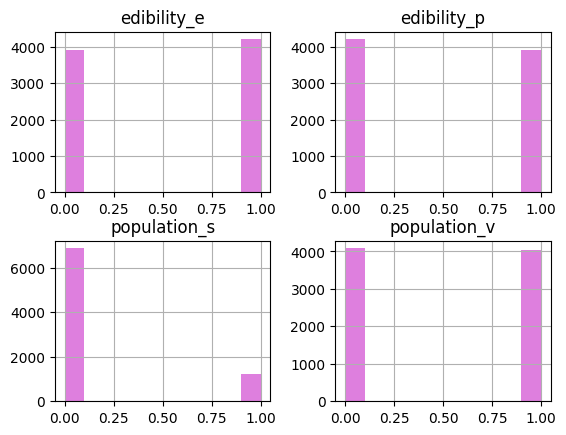

In [24]:
import matplotlib.pyplot as plt

plt.figure()
shrooms[['edibility_e', 'edibility_p', 'population_s', 'population_v']].hist(color='m', alpha=0.5)

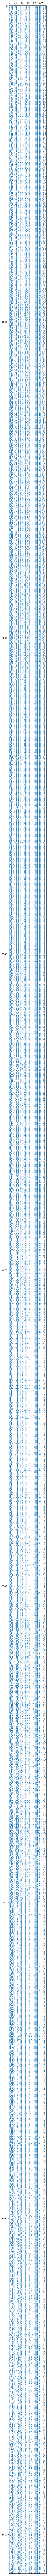

In [26]:
plt.figure(figsize=(200, 200))
plt.spy(shrooms, markersize=0.5)
plt.show()